In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('StressLevelDataset.csv')

1) Anxiety : range from 0 to 21, Measure : GAD-7
2) Self-esteem : range 0 to 30, Measure: Rosenberg Self Esteem Scale
3) Mental Health History : 0 if no mental health history, 1 if mental health history
4) Depression : range 0 to 27, Measure: Patient Health Questionnaire (PHQ-9)
5) Other features mostly range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.

In [5]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [7]:
data.isna().any()

anxiety_level                   False
self_esteem                     False
mental_health_history           False
depression                      False
headache                        False
blood_pressure                  False
sleep_quality                   False
breathing_problem               False
noise_level                     False
living_conditions               False
safety                          False
basic_needs                     False
academic_performance            False
study_load                      False
teacher_student_relationship    False
future_career_concerns          False
social_support                  False
peer_pressure                   False
extracurricular_activities      False
bullying                        False
stress_level                    False
dtype: bool

In [9]:
corr = data.corr()

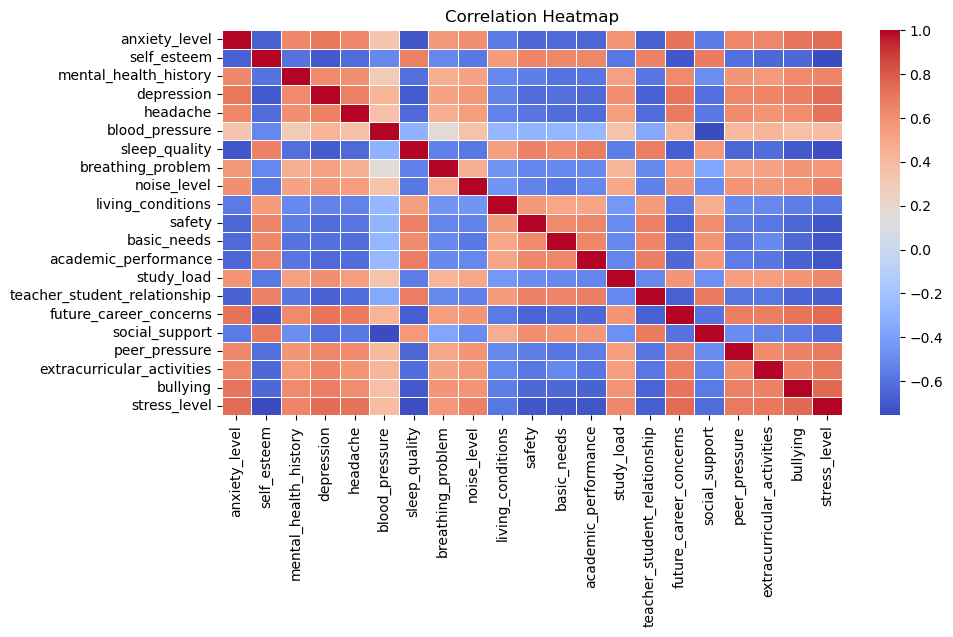

In [11]:
# Heatmap of correlations
plt.figure(figsize=(10, 5))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Features and target variable
X = data.drop('anxiety_level', axis=1)
y = data['anxiety_level']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 11.459489153489226
R-squared: 0.6942188661048698


In [14]:
top_3_features = corr['anxiety_level'].apply(lambda x: abs(x)).sort_values(ascending=False)[1:4].index.tolist()

X = data[top_3_features]
y = data['anxiety_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 12.28
R^2 Score: 0.67
